In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from PIL import Image
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping
#from keras.utils import plot_model
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

import time

import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator


In [2]:
path_dir = "/content/drive/MyDrive/Teknofest/Data/Cleaned_PNG_Folders"
inmeyok_dir = path_dir + "/INMEYOK"
iskemi_dir = path_dir + "/ISKEMI"
kanama_dir = path_dir + "/KANAMA"

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['multiply', 'dot', 'average', 'logging', 'maximum', 'shuffle', 'random', 'concatenate', 'save', 'minimum', 'subtract', 'add', 'get']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


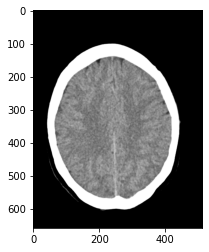

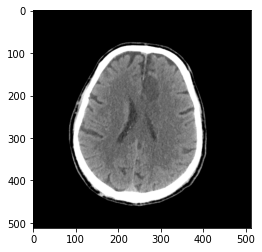

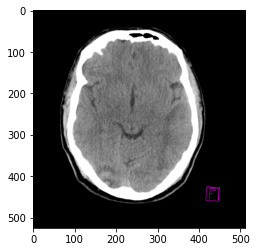

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

inmeyok_example1 = inmeyok_dir + "/17005.png"
img = mpimg.imread(inmeyok_example1)
imgplot = plt.imshow(img)
plt.show()

iskemi_example1 = iskemi_dir + "/16981.png"
img = mpimg.imread(iskemi_example1)
imgplot = plt.imshow(img)
plt.show()

kanama_example1 = kanama_dir + "/17000.png"
img = mpimg.imread(kanama_example1)
imgplot = plt.imshow(img)
plt.show()

In [4]:
dir = path_dir
img_height = 224
img_width = 224
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 5329 images belonging to 3 classes.
Found 1331 images belonging to 3 classes.


In [5]:
model = Sequential([
    tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='max'),
    Flatten(),
    Dense(30,activation = 'relu'),
    Dense(3,activation = 'softmax')
])

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
model.fit(
        train_generator,
        validation_data = validation_generator,
        epochs=30)

Epoch 1/30
84/84 [==============================] - 2483s 29s/step - loss: 1.2100 - acc: 0.6483 - val_loss: 0.8722 - val_acc: 0.6649
Epoch 2/30
84/84 [==============================] - 71s 843ms/step - loss: 0.8757 - acc: 0.6609 - val_loss: 0.8917 - val_acc: 0.6649
Epoch 3/30
84/84 [==============================] - 70s 836ms/step - loss: 0.8408 - acc: 0.6647 - val_loss: 0.8296 - val_acc: 0.6649
Epoch 4/30
84/84 [==============================] - 71s 841ms/step - loss: 0.8142 - acc: 0.6679 - val_loss: 0.7835 - val_acc: 0.6649
Epoch 5/30
84/84 [==============================] - 71s 842ms/step - loss: 0.7750 - acc: 0.6761 - val_loss: 0.7895 - val_acc: 0.6754
Epoch 6/30
84/84 [==============================] - 71s 839ms/step - loss: 0.7536 - acc: 0.6876 - val_loss: 0.7320 - val_acc: 0.7160
Epoch 7/30
84/84 [==============================] - 71s 844ms/step - loss: 0.7023 - acc: 0.7082 - val_loss: 0.7105 - val_acc: 0.7153
Epoch 8/30
84/84 [==============================] - 71s 843ms/step - 

In [7]:
model.evaluate(validation_generator)

21/21 [==============================] - 7s 320ms/step - loss: 0.3585 - acc: 0.9113


[0.358521431684494, 0.9113448262214661]

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_predictions(test = validation_generator):
    predictions = np.array([])
    labels =  np.array([])
    for x, y in test:
        predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
        labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    return labels,predictions

def get_confusion(true =true,preds = preds ,normalize = None):
    con = confusion_matrix(true, preds , normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels = None)
    disp.plot()
    return con


NameError: ignored

In [ ]:
preds = model.predict(validation_generator)
true,preds = get_predictions()
get_confusion(true =true,preds = preds ,normalize = 'true')